In [71]:
import numpy as np
import pandas as pd
import os
import geopandas as gpd

In [72]:
shapefile_path = r'C:\Users\rishi\ml_projects\climate\hmda_boundary\hmda_boundary.shp'
gdf = gpd.read_file(shapefile_path)
bbox = gdf.total_bounds
print(bbox)

[78.00405826 16.93264351 79.04971836 17.90150706]


In [73]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show

geo_tiff_path = r'C:\Users\rishi\ml_projects\UHI\Landsat_14\LST\March.tif' 

with rasterio.open(geo_tiff_path) as src:
    band10 = src.read(1).astype(float)
    cloud=src.read(3).astype(int)
    unc=src.read(2).astype(float)*.01 
    st_meta=src.meta
    # Metadata
    transform = src.transform
    extent = [transform[2], transform[2] + transform[0] * src.width,
              transform[5] + transform[4] * src.height, transform[5]]

    LST_K=band10*0.00341802+149
    LST_C=LST_K-273.15
    # fig, ax = plt.subplots(figsize=(10, 10))
    # plt.imshow(LST_C, cmap='rainbow', extent=extent)  
    # plt.title("Land Surface Temperature (LST) - Hyderabad")
    # plt.xlabel("Longitude")
    # plt.ylabel("Latitude")
    # cbar = plt.colorbar()
    # gdf.boundary.plot(ax=ax, edgecolor='black')
    # cbar.set_label("Temperature (°C)")
    # plt.show()

In [74]:
too_high=0
nan_count=0
lst2=LST_C
for i in range(len(unc)):
    for j in range(len(unc[0])):
        if unc[i][j]>=7:
            lst2[i][j]=np.nan
            nan_count+=1
        if LST_C[i][j]>=55:
            too_high+=1

In [75]:
nan_count

109

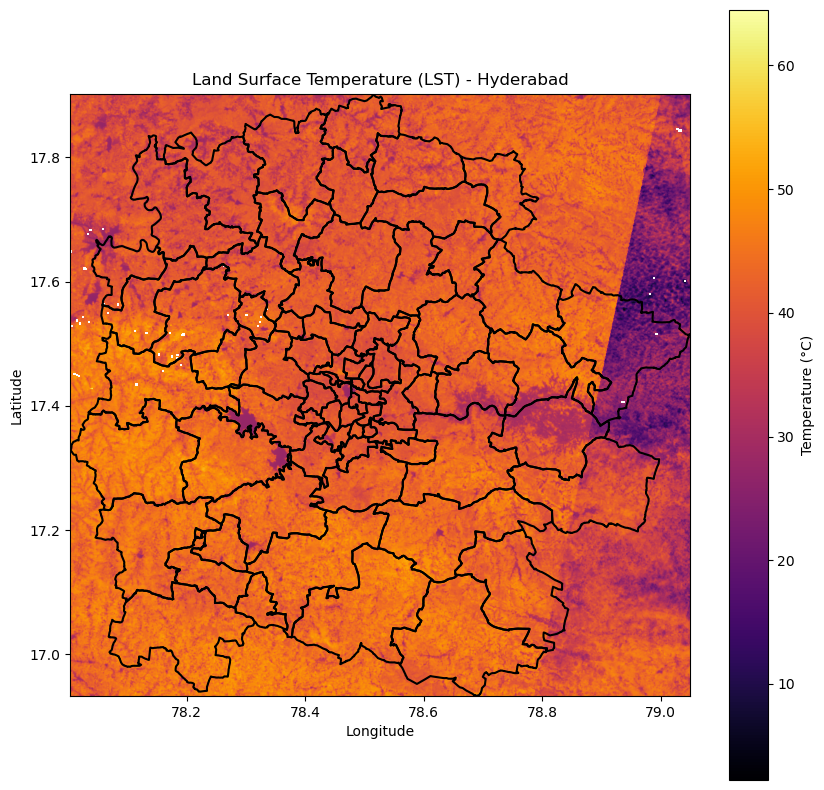

In [76]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(lst2, cmap='inferno', extent=extent)  
plt.title("Land Surface Temperature (LST) - Hyderabad")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
cbar = plt.colorbar()
gdf.boundary.plot(ax=ax, edgecolor='black')
cbar.set_label("Temperature (°C)")
plt.show()


## UHI Calculation

In [77]:
mean=np.nanmean(lst2)
sd=np.nanstd(lst2)

In [78]:
print(f"Mean : {mean}     Standard Deviation : {sd}")

Mean : 40.860011044832476     Standard Deviation : 6.075522951908157


In [79]:
uhi=np.zeros((len(lst2),len(lst2[0])))
uhi.shape
avg_urban=0
avg_rural=0
urban_count=0
rural_count=0

In [80]:
for i in range (len(lst2)):
    for j in range(len(lst2[0])):
        if lst2[i][j]> mean + 0.5*sd:
            uhi[i][j]=1
            avg_urban+=lst2[i][j]
            urban_count+=1
        elif lst2[i][j]<= mean + 0.5*sd:
            uhi[i][j]=-1
            avg_rural+=lst2[i][j]
            rural_count+=1
avg_rural=avg_rural/rural_count
avg_urban=avg_urban/urban_count

In [81]:
avg_rural

38.38685014886587

In [82]:
avg_urban

46.12863356725248

In [83]:
uhi_intensity=avg_urban -avg_rural
uhi_intensity

7.7417834183866105

In [84]:
uhi_intensity/avg_rural

0.2016780066185071

In [85]:
uhi

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

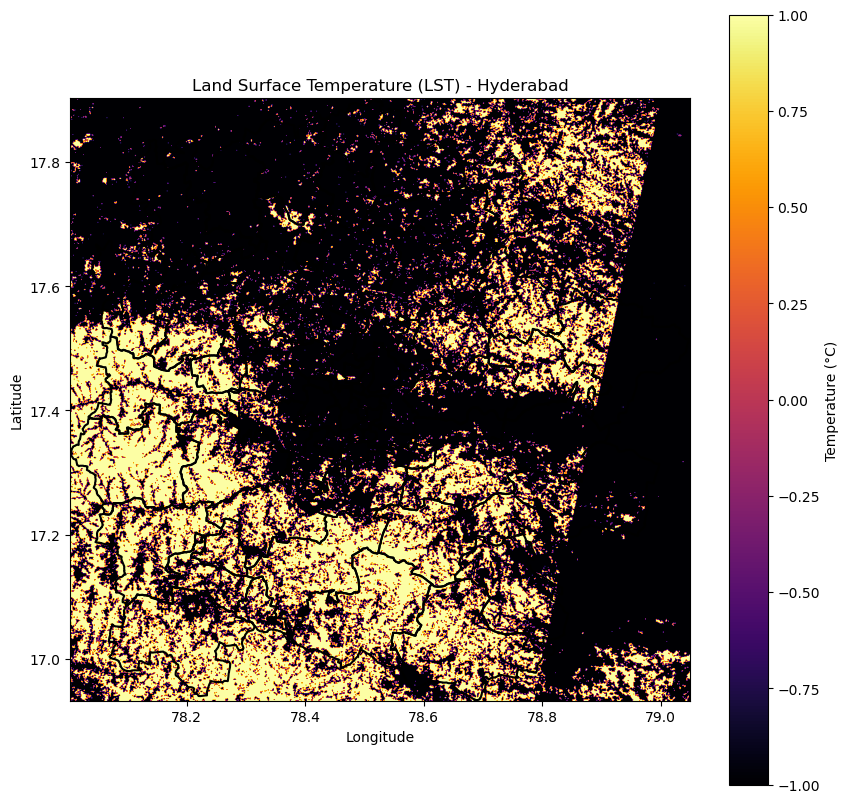

In [86]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(uhi, cmap='inferno', extent=extent)  
plt.title("Land Surface Temperature (LST) - Hyderabad")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
cbar = plt.colorbar()
gdf.boundary.plot(ax=ax, edgecolor='black')
cbar.set_label("Temperature (°C)")
plt.show()
